# BlueBook Bulldozers price prediction competition From kaggle 


## 1. Problem defination

>how cane we predict the price of the bulldozers from the characteristics and the previous examples for how similar the buldozers have been sold ?  
## 2. Data
the data have been downloaded from the Bluebook bulldozers competition 
There are three main data sets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**NOTE** The goal of the each regression evaluation matrices is to minimize the error , for example, our goal is to build the machine learning model to  minimize the RMLSE 

## 4. Features of the data 

kaggle has provided the features of the data in the datadictionary  detailing the all the features of the sales named as (Data Dictionary.xlsx)

In [2]:
import numpy as np 
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt 

In [3]:
# importing the train and validation sets
df= pd.read_csv("data/TrainAndValid.csv", low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the missing values in the dataframe  

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

## creating the Date Time columns (parsing Date)
as this is the time series problem there should be the pandas time frame columns

it is good idea to make sure that the data is in the format of  datetime object (a python data frame which encodes specific information about dates )


In [5]:
# cheking the data in the saledate columns
df.saledate

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

In [6]:
# reimporting the data 
df= pd.read_csv("data/TrainAndValid.csv", 
                low_memory=False,
                parse_dates=["saledate"])


In [7]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

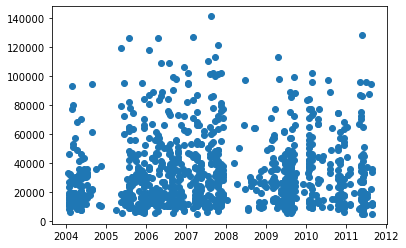

In [8]:
# visualization of the saledate per saleprice scatter graph
fig, ax= plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

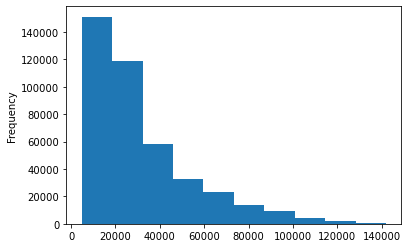

In [9]:
df.SalePrice.plot.hist();

### Sorting the data by sale date 

In [10]:
# sorting the data by saledate
df.sort_values(by=["saledate"], inplace= True)

In [11]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### we need tro save the orignal file and work on the copied file to ensure the data 

In [12]:
df_copy=df.copy()
df_copy.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

### Creating the new columns named year, day of month, day of year, day of week 
we need to create a defined function which will create a desierd changes in the data with ease  

In [13]:
def preprocess_data(df):
    """
    performs the transfromation on the dataframe and return the data frame 
    param = dataframe 
    """
    # for dates in the dataframe
    df.sort_values(by=['saledate'], inplace= True)
    df["saleYear"]=df.saledate.dt.year
    df["saleMonth"]= df.saledate.dt.month
    df["saleDay"]= df.saledate.dt.day
    df["saleDayofWeek"]=df.saledate.dt.dayofweek
    df["saleDayofYear"]=df.saledate.dt.dayofyear
    
    # dropint the saledate coloumn from the dataframe
    df.drop("saledate", axis=1, inplace=True)
    
    # filling  the numeric values in the data frame 
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # creating a column in the dataframe with missing value True\False
                df[label+"_is_missing"]= pd.isnull(content)
                
                # filling the null values in the Dataframe with the median()
                df[label]=content.fillna(content.median())
                
    # creating a pandas catorgory and filling the missing values and turn catagories in to numbers
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            #creating a column in dataframe with missing value True\False
            df[label+"_is_missing"]=pd.isnull(content)
            
            # creating a catogorial value and adding +1 to the catagorial code as the 
            # null value in the dataframe, computer consider it as a -1
            df[label]= content.astype("category").cat.as_ordered()
            df[label]=pd.Categorical(content).codes+1
    
    
    return df
        
        
        

In [14]:
preprocess_data(df_copy)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
233186,1728883,30000.0,1523610,9105,132,99.0,1986,0.0,0,4772,...,True,True,True,True,True,True,True,True,True,True
142491,1508502,21000.0,1153157,4138,132,99.0,1972,0.0,0,2347,...,True,True,True,True,True,False,False,False,True,True
115536,1452578,33000.0,1544443,3854,132,99.0,1974,0.0,0,1767,...,True,True,True,True,True,True,True,True,False,False
92301,1403418,24000.0,1390168,7110,132,99.0,1986,0.0,0,744,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409901,6286556,23000.0,1793587,4605,149,99.0,2006,0.0,0,500,...,True,True,True,True,True,True,True,True,True,True
405777,6256957,11500.0,1860454,6868,149,99.0,1000,0.0,0,1679,...,False,False,False,False,False,True,True,True,True,True
411889,6312472,11000.0,1820676,17231,149,99.0,2006,0.0,0,581,...,False,False,False,False,False,True,True,True,True,True
411890,6312473,11000.0,1796787,17231,149,99.0,2006,0.0,0,581,...,False,False,False,False,False,True,True,True,True,True


In [15]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
233186,1728883,30000.0,1523610,9105,132,99.0,1986,0.0,0,4772,...,True,True,True,True,True,True,True,True,True,True
142491,1508502,21000.0,1153157,4138,132,99.0,1972,0.0,0,2347,...,True,True,True,True,True,False,False,False,True,True
115536,1452578,33000.0,1544443,3854,132,99.0,1974,0.0,0,1767,...,True,True,True,True,True,True,True,True,False,False
92301,1403418,24000.0,1390168,7110,132,99.0,1986,0.0,0,744,...,True,True,True,True,True,True,True,True,True,True


## saving the data created

In [16]:
df_copy.to_csv("processed training and validation sets")

# Modeling 
now we have the data enriched and we have pasrsed date in the model

we can do the exploratory dataframe analysis(EDA) by own but we will use the machine learning model to do the EDA for us 

one of the biggest goal is to reduce the time between the experiment

In [17]:
# this willwork as we have filled the missing values in the data 

# importing the model
from sklearn.ensemble import RandomForestRegressor

according to the Kaggle data the train and test sets are seperated according to the dates 

which make sense as we are working on the time frame data i.e from previous data we have to predict the future prices
knowing this randomly splitting the data wont work properly

instead we will seperates the data into time frame as follows:
* train split all samples untill 2011
* validation split all samples from 1st january 2012- 30th april 2012
* test set all samples from 1st may 2012- november 2012


In [18]:
#creating the diffrent dataframe from the parsed dataframe 
# and then fill it with the missing values using the defined function preprocess_data() 
# as there shouldnt be any traces in the validation sets from the training sets which will create inacurracy in our predictions
# named as df_train and df_val
# processing a dataframe df with date i.e sorting it and creating the year, month, day, day of week, day of year columns and d0roping the saledate column
# reimporting the data frame train and validation sets 
df=pd.read_csv("data/TrainAndValid.csv", parse_dates=["saledate"], low_memory= False)
# for dates in the dataframe
df.sort_values(by=['saledate'], inplace= True)    
df["saleYear"]=df.saledate.dt.year
df["saleMonth"]= df.saledate.dt.month
df["saleDay"]= df.saledate.dt.day
df["saleDayofWeek"]=df.saledate.dt.dayofweek
df["saleDayofYear"]=df.saledate.dt.dayofyear
    
# dropint the saledate coloumn from the dataframe
df.drop("saledate", axis=1, inplace=True)





In [19]:
# spliting the sets 
df_val = df[df.saleYear==2012]
df_train= df[df.saleYear!=2012]

In [20]:
df_val.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
405675,4449186,46173.2,2318824,26964,173,99.0,1996,0.0,NaN,D65E12,...,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN,2012,1,1,6,1
401133,1222855,66000.0,531393,23926,121,3.0,1000,8145.0,Low,12HNA,...,NaN,NaN,NaN,NaN,NaN,2012,1,4,2,4
406076,6258613,26800.0,1810917,13260,149,99.0,2000,24.0,Low,590SUPER LII,...,NaN,NaN,NaN,NaN,NaN,2012,1,4,2,4
409018,6282680,42100.0,1543404,1830,149,99.0,2004,4373.0,Medium,120C,...,NaN,NaN,NaN,NaN,NaN,2012,1,4,2,4
409026,6282759,62100.0,1863077,11390,149,99.0,2006,3467.0,Medium,160CLC,...,NaN,NaN,NaN,NaN,NaN,2012,1,4,2,4


In [21]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [22]:
# procesing the train and val dfs
#for training set 
# filling  the numeric values in the data frame 
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
         if pd.isnull(content).sum():
            # creating a column in the dataframe with missing value True\False
            df_train[label+"_is_missing"]= pd.isnull(content)
                
            # filling the null values in the Dataframe with the median()
            df_train[label]=content.fillna(content.median())
                
# creating a pandas catorgory and filling the missing values and turn catagories in to numbers
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        #creating a column in dataframe with missing value True\False
        df_train[label+"_is_missing"]=pd.isnull(content)
            
        # creating a catogorial value and adding +1 to the catagorial code as the 
        # null value in the dataframe, computer consider it as a -1
        df_train[label]= content.astype("category").cat.as_ordered()
        df_train[label]=pd.Categorical(content).codes+1

        


C:\Users\JADHAV\AppData\Local\Temp/ipykernel_3092/2597653013.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label+"_is_missing"]= pd.isnull(content)
C:\Users\JADHAV\AppData\Local\Temp/ipykernel_3092/2597653013.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label]=content.fillna(content.median())
C:\Users\JADHAV\AppData\Local\Temp/ipykernel_3092/2597653013.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [23]:
# for validation set
# filling  the numeric values in the data frame 
for label, content in df_val.items():
    if pd.api.types.is_numeric_dtype(content):
         if pd.isnull(content).sum():
            # creating a column in the dataframe with missing value True\False
            df_val[label+"_is_missing"]= pd.isnull(content)
                
            # filling the null values in the Dataframe with the median()
            df_val[label]=content.fillna(content.median())
                
# creating a pandas catorgory and filling the missing values and turn catagories in to numbers
for label, content in df_val.items():
    if not pd.api.types.is_numeric_dtype(content):
        #creating a column in dataframe with missing value True\False
        df_val[label+"_is_missing"]=pd.isnull(content)
            
        # creating a catogorial value and adding +1 to the catagorial code as the 
        # null value in the dataframe, computer consider it as a -1
        df_val[label]= content.astype("category").cat.as_ordered()
        df_val[label]=pd.Categorical(content).codes+1

C:\Users\JADHAV\AppData\Local\Temp/ipykernel_3092/2521489459.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label+"_is_missing"]= pd.isnull(content)
C:\Users\JADHAV\AppData\Local\Temp/ipykernel_3092/2521489459.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val[label]=content.fillna(content.median())
C:\Users\JADHAV\AppData\Local\Temp/ipykernel_3092/2521489459.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [24]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4537,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1800,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2324,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1799,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2095,...,True,True,True,True,True,False,False,False,True,True


In [25]:
df_val.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
405675,4449186,46173.2,2318824,26964,173,99.0,1996,0.0,0,962,...,True,True,True,True,True,False,False,False,True,True
401133,1222855,66000.0,531393,23926,121,3.0,1000,8145.0,2,23,...,True,True,True,True,True,True,True,True,True,True
406076,6258613,26800.0,1810917,13260,149,99.0,2000,24.0,2,461,...,True,True,True,True,True,True,True,True,True,True
409018,6282680,42100.0,1543404,1830,149,99.0,2004,4373.0,3,14,...,False,False,False,False,False,True,True,True,True,True
409026,6282759,62100.0,1863077,11390,149,99.0,2006,3467.0,3,45,...,False,False,False,False,False,True,True,True,True,True


In [26]:
len(df_train), len(df_val)

(401125, 11573)

there is some thing missing in the validation dataframe  as its columns count is only 102 and that of training dataframe is 103 so we will check which colun is missing 

In [27]:
set(df_train.columns)-set(df_val.columns)

{'auctioneerID_is_missing'}

We have found the missing column in the validation data frame so we will add the column in the same dataframe according to its atributtives
here we have values in atributtives in True or False 
in our data frame we have all the values present so we arent missing with the values so we will add it as a false 

In [28]:
df_val["auctioneerID_is_missing"]= False

C:\Users\JADHAV\AppData\Local\Temp/ipykernel_3092/685430243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val["auctioneerID_is_missing"]= False


In [29]:
%%time
# model instantiating
model = RandomForestRegressor(n_jobs=-1)
# model fitting with the training sets 

model.fit(df_train.drop("SalePrice", axis=1), df_train["SalePrice"])

Wall time: 3min 20s


RandomForestRegressor(n_jobs=-1)

In [30]:
model.score(df_val.drop("SalePrice", axis=1), df_val["SalePrice"])

C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.5113534773096287

Our baseline model uses the coeficient of regression(R^2) as a scoring method.. but we want the values in the Root Mean Squared Log Error(RMSLE) which is not available in the sklearn so we need to define it and create our own scoring function RMSLE

so our baseline Model is not reliable 

In [31]:
# creating x and y splits on training  and validation datasets 
x_train, y_train= df_train.drop("SalePrice", axis=1), df_train["SalePrice"]

x_valid, y_valid= df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

In [32]:
# we also need mean absolute error as to cross check the actual error
from sklearn.metrics import mean_absolute_error

# creating a scoring function RMSLE
# we need the mean squared log error to import from sklearn.metrics
from sklearn.metrics import mean_squared_log_error
def rmsle(y_test, y_preds):
    """
    Calculate the root mean squared log error between Predictions and true labels 
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [42]:
# we will create function to evaluate our scores 
def show_scores(model):
    train_predict= model.predict(x_train)
    val_predict= model.predict(x_valid)
    
    # creating a dictionary where the scores will be updated 
    score ={"training MAE" : mean_absolute_error(y_train, train_predict),
            "validation MAE": mean_absolute_error(y_valid, val_predict),
            "training RMSLE": rmsle(y_train, train_predict),
            "validation RMSLE": rmsle(y_valid, val_predict),
            "training R^2": model.score(x_train, y_train),
            "validation R^2": model.score(x_valid,y_valid)}
    return score

### Testing Our Model on Subsets(to tune the Hyperparameters)

In [35]:
len(x_train)

401125

In [36]:
# change the max sample values
np.random.seed(42)
model = RandomForestRegressor(n_jobs=-1,
                             max_samples=10000)

In [37]:
%%time
# cutting down the number of max samples each estimator can see the improve traing time
model.fit(x_train,y_train)

Wall time: 8.72 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [39]:
x_train.shape[0]*100/1000000

40.1125

In [43]:
show_scores(model)

C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'training MAE': 5561.286907148645,
 'validation MAE': 9974.681324634927,
 'training RMSLE': 0.2577478749317532,
 'validation RMSLE': 0.39697493931066363,
 'training R^2': 0.8606644092878912,
 'validation R^2': 0.6456119864111094}

### Hyperparameter Tuning with RandomizedSearchCV

In [47]:
%%time
from sklearn.model_selection import RandomizedSearchCV


# Diffrent RandomForestRegressor hyperparameter
rf_grid= {"n_estimators": np.arange(10,100,10),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          "max_samples":[10000]}

# Instantiate the RandomizedSearchCV model 
rs_model= RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                            param_distributions = rf_grid,
                            n_iter=2,
                            cv=5,
                            verbose=True)

#fit the RandomizedSearchCV model 
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 55.6 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [48]:
# finding Best Params
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 5}

In [49]:
# Evaluate RandomizedSearchCV Model
show_scores(rs_model)

C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'training MAE': 9819.90552759614,
 'validation MAE': 13440.43341055282,
 'training RMSLE': 0.42214532365996704,
 'validation RMSLE': 0.5295394328703371,
 'training R^2': 0.6221993918406905,
 'validation R^2': 0.5138574222784942}

## Training model with the best huperparameters 
**Note**  These were found doing 100 iterations by @mrdbourke which took lot of time 

In [50]:
%%time
# Most Idea Hyperparameters
ideal_model=RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None,
                                  random_state=42)

# Fit the Ideal Model
ideal_model.fit(x_train, y_train)

Wall time: 40.6 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [51]:
#scores on Ideal Model 
show_scores(ideal_model)

C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'training MAE': 2953.827118171212,
 'validation MAE': 11302.684100612181,
 'training RMSLE': 0.14469030002611996,
 'validation RMSLE': 0.4587223379290785,
 'training R^2': 0.9588140500677409,
 'validation R^2': 0.5903188266205008}

In [52]:
# scores on the rs_model (with 10,000 samples)
show_scores(rs_model)

C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


{'training MAE': 9819.90552759614,
 'validation MAE': 13440.43341055282,
 'training RMSLE': 0.42214532365996704,
 'validation RMSLE': 0.5295394328703371,
 'training R^2': 0.6221993918406905,
 'validation R^2': 0.5138574222784942}

# Making Predictions on Test Datasets

In [57]:
#Import the Test dataset
df_test= pd.read_csv("data/Test.csv",
                     low_memory=False,
                     parse_dates= ["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


We have to process the data as we dont have the form of data which is same as we trained out model so luckily we have created a function above `preprocess_data`, so we will make use of it

In [58]:
df_test=preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,True
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,True
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,True
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,True,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,False,True,True,True,True,True


In [59]:
# To check the missing columns in the df_test
set(x_train.columns)- set(df_test.columns)

{'auctioneerID_is_missing'}

Still we have missing column in the df_test which is `auctioneerID_is_missing`
so we manually adjust the column


In [60]:
# manually Adjusting the colum `acutioneerID_is_missing`
df_test["auctioneerID_is_missing"]= False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,3,397,148,...,True,True,True,True,True,True,True,True,True,False
1023,4249784,1745722,3178,172,1,1995,4489.0,2,509,180,...,True,True,True,True,True,True,True,True,True,False
1728,4392603,2283116,18111,172,1,2004,2126.0,2,906,320,...,True,True,True,True,True,True,True,True,True,False
1167,4274831,2288988,3783,172,1,2001,9115.0,3,824,290,...,True,True,True,True,True,True,True,False,False,False
1594,4362801,2300591,16490,172,1,2006,885.0,2,1513,610,...,False,False,False,False,True,True,True,True,True,False


Finally we have the same shape of the data Frame as of the data frame on which we trained our model 

In [61]:
#prediction on test datasets
test_preds= ideal_model.predict(df_test)
test_preds

C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([15707.33448651, 18097.59646274, 24327.53868135, ...,
       44400.22163686, 43881.42236246, 39232.57367976])

We have made predictions but they are not in the form as the Kaggle wants them so

In [62]:
#format predictions to the same as kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"]= df_test["SalesID"]
df_preds["SalesPrice"] = test_preds

df_preds.head()

,SalesID,SalesPrice
1408,4317459,15707.334487
1023,4249784,18097.596463
1728,4392603,24327.538681
1167,4274831,25844.868510
1594,4362801,22844.681888


In [63]:
# Export predictions to csv file in the data 
df_preds.to_csv("data/test_predictions.csv")

## Features Importaance
feature importance seeks to figure out which important attributtives of the data were most Important we comes to predict the target variables(SalePrice) 

In [65]:
# Finding the feature Importance of our data

ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [68]:
# helper function to plot the feature Importance 
def plot_feature_importance(columns, importances, n=20):
    df=pd.DataFrame({"Features": columns,
                     "Feature_importances": importances}).sort_values("Feature_importances", ascending = False).reset_index(drop=True)
    
    
    # plotiing the dataframe 
    fig, ax=plt.subplots()
    ax.barh(df["Features"][:n], df["Feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature_Importances")
    ax.invert_yaxis()

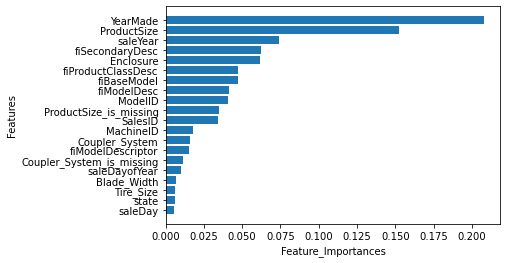

In [69]:
plot_feature_importance(x_train.columns, ideal_model.feature_importances_)